## DL Learn
Deep learning with numpy

this notebook is based on &lt;&lt;Deep Learning from scratch&gt;&gt; by Saito Goki.

In [1]:
%pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


## 퍼셉트론
딥러닝, 신경망에서 우리가 생각할 수 있는 가장 최소 단위의 함수를 퍼셉트론(단일 퍼셉트론)이라 한다

퍼셉트론은 다음과 같은 간단한 함수이며 여러 데이터 값을 받아 하나의 출력을 하는 함수로 인간의 뇌에서 신경 세포와 비슷한 구조를 가진다.

```
y={0 (w1*x1+w2*x2 <= θ)}
  {1 (w1*x1+w2*x2 > θ)}
```

받은 백터 x에 각각 일치하는 가중치 w를 곱한 후 해당 값이 특정 임계값 θ를 넘어가면 0, 아니면 1을 출력한다 \
파이썬으로 작성하면 다음과 같다:

In [2]:
def perceptron_1 (x1, x2):
  w1, w2, theta = a, b, c # type: ignore

  if x1*w1 + x2*w2 <= theta:
    return 0
  else:
    return 1

우리는 이때 가중치 w와 임계값 θ를 잘 활용하면 여러 함수들을 만들 수 있게 된다. \
다음은 AND 연산을 해주는 퍼셉트론이다.

In [3]:
def and_perceptron (x1, x2):
  w1, w2, theta = 0.5, 0.5, 0.7

  if x1*w1 + x2*w2 <= theta:
    return 0
  else:
    return 1
  
print('0 AND 0 =', and_perceptron(0, 0))
print('1 AND 0 =', and_perceptron(1, 0))
print('0 AND 1 =', and_perceptron(0, 1))
print('1 AND 1 =', and_perceptron(1, 1))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


이 퍼셉트론을 쫌 더 재밌게 만들어 보자. \
앞서 봤던 퍼셉트론의 `(w1*x1+w2*x2 <= θ)` 부분을 다음과 같이 표현할 수 있다.


```
y={0 (w1*x1+w2*x2+b <= 0)}
  {1 (w1*x1+w2*x2+b > 0)}
```

부등호 뒤에 있던 임계값 θ를 앞으로 옮겼을 뿐이다. 이제 우리는 그것을 편향 b라고 부른다.\
당연히 b 값은 이제 부호를 반대로 하여 주어야 한다.

개선된 식으로 가독성 높은 코드와 빠른 속도를 위해 numpy 라이브러리를 통해 AND, NAND, OR 게이트를 만들어 보자.

In [4]:
def and_perceptron2 (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.7

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 AND 0 =', and_perceptron2(np.array([0, 0])))
print('1 AND 0 =', and_perceptron2(np.array([1, 0])))
print('0 AND 1 =', and_perceptron2(np.array([0, 1])))
print('1 AND 1 =', and_perceptron2(np.array([1, 1])))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


In [5]:
def nand_perceptron (x: np.ndarray):
  w = np.array([-0.5, -0.5])
  b = 0.7

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 NAND 0 =', nand_perceptron(np.array([0, 0])))
print('1 NAND 0 =', nand_perceptron(np.array([1, 0])))
print('0 NAND 1 =', nand_perceptron(np.array([0, 1])))
print('1 NAND 1 =', nand_perceptron(np.array([1, 1])))

0 NAND 0 = 1
1 NAND 0 = 1
0 NAND 1 = 1
1 NAND 1 = 0


In [6]:
def or_perceptron (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.2

  if np.sum(w*x) + b <= 0:
    return 0
  else:
    return 1
  
print('0 OR 0 =', or_perceptron(np.array([0, 0])))
print('1 OR 0 =', or_perceptron(np.array([1, 0])))
print('0 OR 1 =', or_perceptron(np.array([0, 1])))
print('1 OR 1 =', or_perceptron(np.array([1, 1])))

0 OR 0 = 0
1 OR 0 = 1
0 OR 1 = 1
1 OR 1 = 1


이렇게 AND, NAND, OR 게이트를 퍼셉트론을 통해 구현할 수 있다.

이처럼 함수의 수정 없이 가중치 w와 편향 b만을 수정하기만 하면 여러 상황들을 만들어 낼 수 있는 것이 퍼셉트론의 장점이다.

### 다층 퍼셉트론
퍼셉트론 하나만으론 XOR 게이트를 구현할 수 없다.

퍼셉트론은 x{1}과 x{2}의 축을 가진 그래프에서 가상의 직선을 하나 그어 0과 1 값을 구분하는 함수이다. \
하지만 XOR은 직선 하나만으로 구분할 수 없고 (즉 선형으로는 해결할 수 없고) \
직선이 아닌 선으로 (비선형으로) 그어야 구분할 수 있다.

이 비선형 구분을 하는 XOR 게이트와 같은 알고리즘은 여러 퍼셉트론을 결합하여 구현할 수 있다. \
마치 AND, NAND, OR 게이트로 XOR 게이트를 만들 수 있는 것 처럼 말이다.

In [7]:
def xor_perceptron(x: np.ndarray):
  y = np.array([nand_perceptron(x), or_perceptron(x)])
  return and_perceptron2(y)


print('0 XOR 0 =', xor_perceptron(np.array([0, 0])))
print('1 XOR 0 =', xor_perceptron(np.array([1, 0])))
print('0 XOR 1 =', xor_perceptron(np.array([0, 1])))
print('1 XOR 1 =', xor_perceptron(np.array([1, 1])))

0 XOR 0 = 0
1 XOR 0 = 1
0 XOR 1 = 1
1 XOR 1 = 0


XOR을 구현하는 이 다층 퍼셉트론은 2개의 층으로 구성되어 있다.

1층: NAND 퍼셉트론과 OR 퍼셉트론이 있는 층 \
2층: AND 퍼셉트론이 있는 층

이렇게 2층을 쌓는 것 만으로도 기존 단일 퍼셉트론으론 할 수 없었던 연산을 가능하게 되었다!\
이 뜻은 퍼셉트론을 여러겹 쌓게 되면 선형적 표현을 넘어서 비선형적 표현도 가능하다는 의미이다.

실제로 이것을 응용하면 인간이 생각할 수 있는 모든 회로를 단 2층의 퍼셉트론으로 모두 구현할 수 있다. (w와 b를 찾는게 매우 어렵겠지만)

## 신경망
위 퍼셉트론에서 문제점이 무엇일까? 바로 사람이 직접 w와 b를 찾아줘야 했던 점이다. \
신경망은 퍼셉트론에 더 많은 기능을 추가하여 자동으로 w와 b를 찾아주는 기능을 구현한다.

아까 구현했던 XOR 회로를 기준으로 신경망의 층을 나눠보자.

입력층: 입력받았던 x가 있는 층 \
은닉층 1층: NAND와 OR 퍼셉트론이 있던 층 \
출력층: AND 퍼셉트론이 있던 층

신경망에서 입력을 받는 층을 입력층, 내부적인 처리를 하는 은닉층, 최종적으로 결과를 계산하는 출력층이 존재한다. \
이때 입력층을 포함해서 3개니까 3층 신경망이 아니냐고 예기를 할 수 있겠지만 w와 b를 계산하지 않는 입력층은 포함되지 않아 2층 신경망이라고 한다.

### 활성화 함수
이제 전의 퍼셉트론 함수를 쫌 더 재미있게 만들어 보자 \
`y={0 (w1*x1+w2*x2+b <= 0)}` 에서 결과 값이 0보다 큰지 작은지 체크하는 부분을 따로 때어 보는것이다.

```
y=h(b+w1*x1+w2+x2)
h={0 (x <= 0)}
  {1 (x > 0) }
```

`b+w1*x1+w2+x2` 의 내용이 0보다 큰지 작은지를 계산하는 부분을 함수 h로 때어내었다.\
이때 이 함수 h는 활성화 함수라고 부른다.

구현한 코드를 보면 더 쉽게 이해할 수 있다.

In [8]:
def h1(x):
  if x <= 0:
    return 0
  else:
    return 1

# numpy를 사용해 배열도 지원하고 짧게 구현해보자
def h2(x: np.ndarray):
  y = x > 0 # 입력받은 배열 x의 모든 값을 0과 비교하고 True, False로 반환한다

  return y.astype(int) # boolean을 0과 1로 변환한다.

# 더 짧게 구현할 수 있다.
def h3(x: np.ndarray):
  return np.array(x > 0, dtype=int)

def and_perceptron3 (x: np.ndarray):
  w = np.array([0.5, 0.5])
  b = -0.7
  y = h3(np.array([np.sum(w*x) + b]))

  return y
  
print('0 AND 0 =', and_perceptron2(np.array([0, 0])))
print('1 AND 0 =', and_perceptron2(np.array([1, 0])))
print('0 AND 1 =', and_perceptron2(np.array([0, 1])))
print('1 AND 1 =', and_perceptron2(np.array([1, 1])))

0 AND 0 = 0
1 AND 0 = 0
0 AND 1 = 0
1 AND 1 = 1


이 활성화 함수의 분리 여부는 퍼셉트론이 신경망으로 진화하는데 큰 역할을 한다.

왜냐면 0과 1을 리턴했던 재미없는 함수(계단 함수) h를 재미있게 수정할 수 있기 때문이다! \
일단 먼저 이때까지 사용했던 계단 함수를 그래프를 통해 확인해보자.

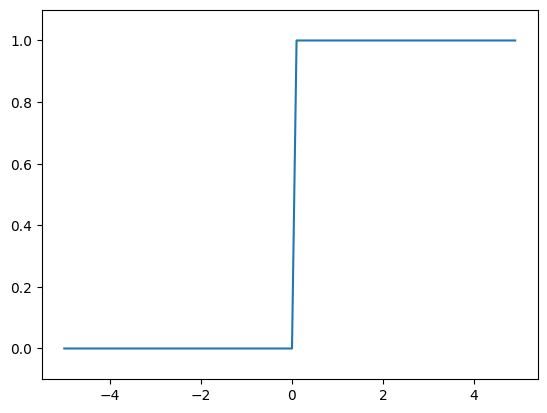

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = h3(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

이렇게 재미없는 선형 함수를 활성화 함수로 하게 되면 신경망의 이점을 얻을 수 없다.

마치 `h=cx`로 함수를 만들고 `y=h(h(h(x)))` 라고 한다면 굳이 저렇게 적지 말고 `y=ax, a=c^3` 이라고만 하면 되는 것 처럼 \
중첩의 의미를 가질 수 없게 되어 쓰는 의미가 없어지기 때문이다.

그럼 비선형적 함수를 한번 만들어보자

### 시그모이드 함수
이번엔 쫌 재밌는 활성화 함수를 만들어 보자. 직선이 가득한 선형적 함수가 아닌\
비선형적 함수를 만들어보는 것이다. 

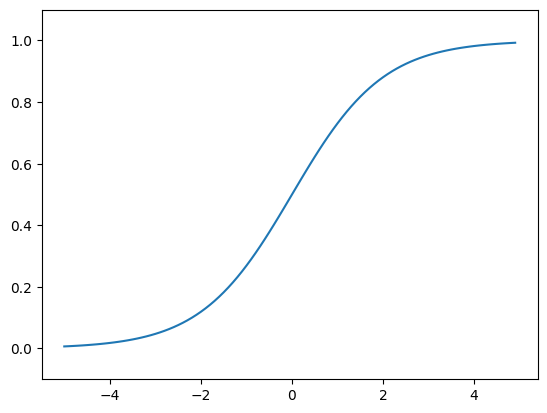

In [10]:
def sigmoid(x: np.ndarray):
  return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


### ReLU 함수
시그모이드 함수를 많이 사용해 왔지만 최근 더 많이 사용되고 있는 ReLU 함수는 다음과 같다\
ReLU 함수는 수식으로 표현하면 다음과 같으며 간단히 max를 통해 구현할 수 있다

```
h={x (x >= 0)}
 ={0 (x <  0)}
```

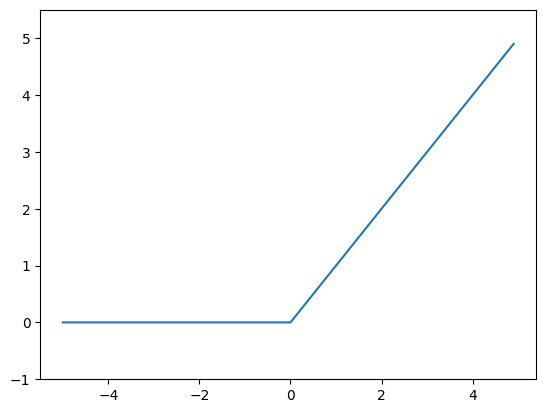

In [11]:
def relu(x: np.ndarray):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5.5)
plt.show()

### 행렬의 점곱
신경망 연산을 이해하기 위해선 행렬의 점곱에 대해서 먼저 알아야 한다.\
A행렬과 B행렬에 대한 곱셈을 할때에는 그냥 원자끼리 곱한다고 해결되는 것이 아니라\
구하고자 하는 x 원소가 위치하는 A 행렬의 모든 행과 x 원소가 위치하는 B 행렬의 모든 열을 곱한뒤 더해 주어야 한다.

즉 다음과 같은 식이 있을때 x를 구하려면 

```
{ 1 2 }   { 5 6 }   { x ? }
{ 3 4 } * { 7 8 } = { ? ? }

x=1*5+2*7=19
```

In [12]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5, 6],
  [7, 8]
])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

이 행렬의 점곱을 해보면서 알 수 있는 사실이 하나 있다.\
바로 A 행렬과 B 행렬을 점곱하려면 A의 행 수와 B의 열 수가 일치해야 한다는 점이다.

이는 다음과 같이 확인해볼 수 있다.

In [13]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5, 6],
  [7, 8],
  [7, 8]
])


# 각 행렬의 크기:
# A = 2x2
# B = 3x2

# np.dot(A, B)

In [14]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([
  [5],
  [7]
])


# 각 행렬의 크기:
# A = 2x2
# B = 2x1

np.dot(A, B)

array([[19],
       [43]])

이렇게 A의 행과 B의 열 수를 맞추지 않은 두 행렬의 대한 점곱은 오류가 발생하는 것을 볼 수 있으며\
일치할 경우 오류가 발생하지 않는 것을 볼 수 있다. 이는 두 행렬의 차원 수가 달라도 적용된다.

In [15]:
A=np.array([
  [1, 2],
  [3, 4]
])

B=np.array([5, 7])


# 각 행렬의 크기:
# A = 2x2
# B = 2

np.dot(A, B)

array([19, 43])

### 행렬의 접곱을 통한 퍼셉트론
위의 `x=1*5+2*7` 식에서 퍼셉트론의 모양이 보이지 않는가?\
그렇다 퍼셉트론 식 `y=h(w1*x1+w2*x2+b)`는 행렬곱을 통해서 더 간단히 표현할 수 있다.

```
X=(입력 x값의 행렬)
W=(가중치 w값의 행렬)
B=(편향 b가 하나 있는 행렬)
A=(결과값 y값의 행렬)

A=h(XW+B)
```

이 규칙을 통해 임의의 x와 w, b로 신경망 1층을 만들어보자.

입력 2개의 대한 퍼셉트론 3개를 가진 층이다.

In [16]:
X=np.array([1.0, 0.5])        # 입력 층 입력값 (크기: 2)
W1=np.array([                 # 1층(퍼셉트론 3개)의 대한 입력값(2개) 각각의 가중치 (크기: 2x3)
  [0.1, 0.3, 0.5],
  [0.2, 0.4, 0.6]
])
B1=np.array([0.1, 0.2, 0.3])  # 1층(퍼셉트론 3개)의 대한 각각의 편향 (크기: 3)

h=sigmoid                     # 활성화 함수로 시그모이드 함수 사용
A1=h(np.dot(X, W1) + B1)      # 1층의 퍼셉트론 3개의 결과값 (크기: 3)

A1

array([0.57444252, 0.66818777, 0.75026011])

1층의 결과값 3개를 다음 층에 넘겨보자

1층 결과값 3개의 대한 2개의 퍼셉트론을 가진 층이다.

In [17]:
W2=np.array([                 # 2층(퍼셉트론 2개)의 대한 1층값(3개) 각각의 가중치 (크기: 3x2)
  [0.1, 0.4],
  [0.2, 0.5],
  [0.3, 0.6]
])
B2=np.array([0.1, 0.2])       # 2층(퍼셉트론 2개)의 대한 각각의 편향 (크기: 2)

h=sigmoid                     # 활성화 함수로 시그모이드 함수 사용
A2=h(np.dot(A1, W2) + B2)     # 2층의 퍼셉트론 2개의 결과값 (크기: 2), 1층의 출력값을 사용

A2

array([0.62624937, 0.7710107 ])

마지막으로 2층의 결과값 2개를 출력 층 (퍼셉트론 2개)에 넘겨보자\
이때 출력층은 활성화 함수로 입력 받은것을 그대로 출력하는 항등 함수를 사용해보자

In [18]:
def identity(x: np.ndarray):
  return x

W3=np.array([                 # 출력층(퍼셉트론 2개)의 대한 2층값(2개) 각각의 가중치 (크기: 2x2)
  [0.1, 0.3],
  [0.2, 0.4]
])
B3=np.array([0.1, 0.2])       # 출력층(퍼셉트론 2개)의 대한 각각의 편향 (크기: 2)

h=identity                    # 활성화 함수로 항등 함수 사용
A3=h(np.dot(A2, W3) + B3)     # 출력층의 퍼셉트론 2개의 결과값 (크기: 2), 2층의 출력값을 사용

A3

array([0.31682708, 0.69627909])

이렇게 3층 신경망을 구현해 보았다. \
방금처럼 출력층에 경우 원하는 출력 형태의 따라 은닉층과 다른 함수를 사용하는 경우가 많다.

Regression (회귀) = 항등 함수\
Classification (분류) = 시그모이드 (클래스 2개), 소프트맥스 (클래스 2개 이상)

### 신경망 구현 정리
앞에서 했던 신경망 구현을 한 스크립트로 모으면 다음과 같다

In [19]:
b1=np.array([0.1, 0.2, 0.3])
W1=np.array([
  [0.1, 0.3, 0.5],
  [0.2, 0.4, 0.6]
])

b2=np.array([0.1, 0.2])
W2=np.array([
  [0.1, 0.4],
  [0.2, 0.5],
  [0.3, 0.6]
])

b3=np.array([0.1, 0.2])
W3=np.array([
  [0.1, 0.3],
  [0.2, 0.4]
])

# ---

def forward(x: np.ndarray):
  a1=sigmoid(np.dot(x, W1) + b1)
  a2=sigmoid(np.dot(a1, W2) + b2)
  a3=identity(np.dot(a2, W3) + b3)

  return a3

# ---

x=np.array([1.0, 0.5])
y=forward(x)

y

array([0.31682708, 0.69627909])

### 소프트맥스 함수
분류 문제에서 사용되는 소프트맥스 활성화 함수는 한가지 다른점이 있다.\
다른 활성화 함수의 경우 xW+b의 대한 결과값만 입력으로 취하지만 소프트맥스 함수의 경우\
해당 함수가 속하는 층의 모든 퍼셉트론의 결과값을 참고하여 활성화 결과를 출력한다.

소프트맥스 함수의 경우 e 값을 적극 사용하며 다음과 같다.

In [20]:
def softmax(a: np.ndarray):
  c=np.max(a)
  exp_a=np.exp(a - c)
  sum_exp_a=np.sum(exp_a)

  return exp_a / sum_exp_a

softmax(y)

array([0.40625907, 0.59374093])

이 소프트맥스 함수의 특징은 입력값의 대소 관계가 그대로 유지되면서도\
출력값이 0과 1 사이의 값들로 다 합칠 경우 1로 떨어지는 특징이 있다.

이는 분류 문제에서 유용하게 사용할 수 있다.

### MNIST 손글씨 데이터셋의 대한 신경망 구현
미리 계산된(학습된) W값과 b값들을 통해 신경망을 구현해보자

이렇게 W값과 b값이 정해진 상태에서 입력을 신경망에 태우는 것을 Forward propagation, 순전파 라고 한다.

In [23]:
import mnist_loader

In [25]:
_, (x, t) = mnist_loader.load_dataset(normalize=True, flatten=True, one_hot_label=False)
network = mnist_loader.load_pretrained()

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  z1 = sigmoid(np.dot(x, W1) + b1)
  z2 = sigmoid(np.dot(z1, W2) + b2)
  y = softmax(np.dot(z2, W3) + b3)

  return y

이후 이 생성한 신경망에 테스트 데이터를 순전파해\
몇 %나 정답을 맞췄는지 확인해 보자

In [31]:
correct_count = 0

for i in range(len(x)):
  y = predict(network, x[i]) # 예측 시작
  p = np.argmax(y)           # softmax 값이 가장 높은 원소 추출

  if p == t[i]:              # 예측 성공하면 1 증가
    correct_count += 1

f"Accuracy: {correct_count / len(x)}" # 모든 데이터 중 맞는것의 비율

'Accuracy: 0.9352'

93.52% 의 정확도로 예측하는데 성공했다. 93%면 높은것 같지만 나중에는 더 정확도를 높혀볼 것이다.

그나저나 위의 스크립트는 데이터 셋을 하나하나 forward 했다.\
더 빠른 속도를 위해(numpy의 최적화 설계에서 최대한 이점을 얻기 위해) 한꺼번에 100개씩 forward해보자.

In [32]:
batch_size = 100
correct_count = 0

for i in range(0, len(x), batch_size):    # i는 이제 100씩 증가한다.
  y = predict(network, x[i:i+batch_size]) # i부터 i+100까지 한꺼번에 예측 시작
  p = np.argmax(y, axis=1)                # softmax 값이 가장 높은 원소 100개 추출

  correct_count += np.sum(p == t[i:i+batch_size]) # np.sum에서 True가 1으로 변환되는 것을 활용해서 맞은 개수를 한꺼번에 계산

f"Accuracy: {correct_count / len(x)}" # 모든 데이터 중 맞는것의 비율

'Accuracy: 0.9352'